In [48]:
import pandas as pd
import numpy as np

In [49]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RandomizedSearchCV, train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [50]:
def outliers_normalization(df):
    '''this function takes all the numerical features and deals with the high and low outliers'''
    num_feat = df.select_dtypes(include='number').columns.tolist()
    for feat in num_feat:
        q1 = df[feat].quantile(0.25)
        q3 = df[feat].quantile(0.75)
        iqr = q3-q1
        outer_fence = 1.5*iqr
        outer_fence_le = q1-outer_fence
        outer_fence_ue = q3+outer_fence
        df.loc[df[feat]>outer_fence_ue,feat]=outer_fence_ue
        df.loc[df[feat]<outer_fence_le,feat]=outer_fence_le
    return df

    

In [51]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

In [52]:
print(train_df.shape)
print(test_df.shape)

(1460, 81)
(1459, 80)


#### Feature engineering

In [53]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [54]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [55]:
X=train_df.drop(columns=['SalePrice'])
y=train_df['SalePrice']

In [56]:
X.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [57]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [58]:
X=outliers_normalization(X)

<AxesSubplot: >

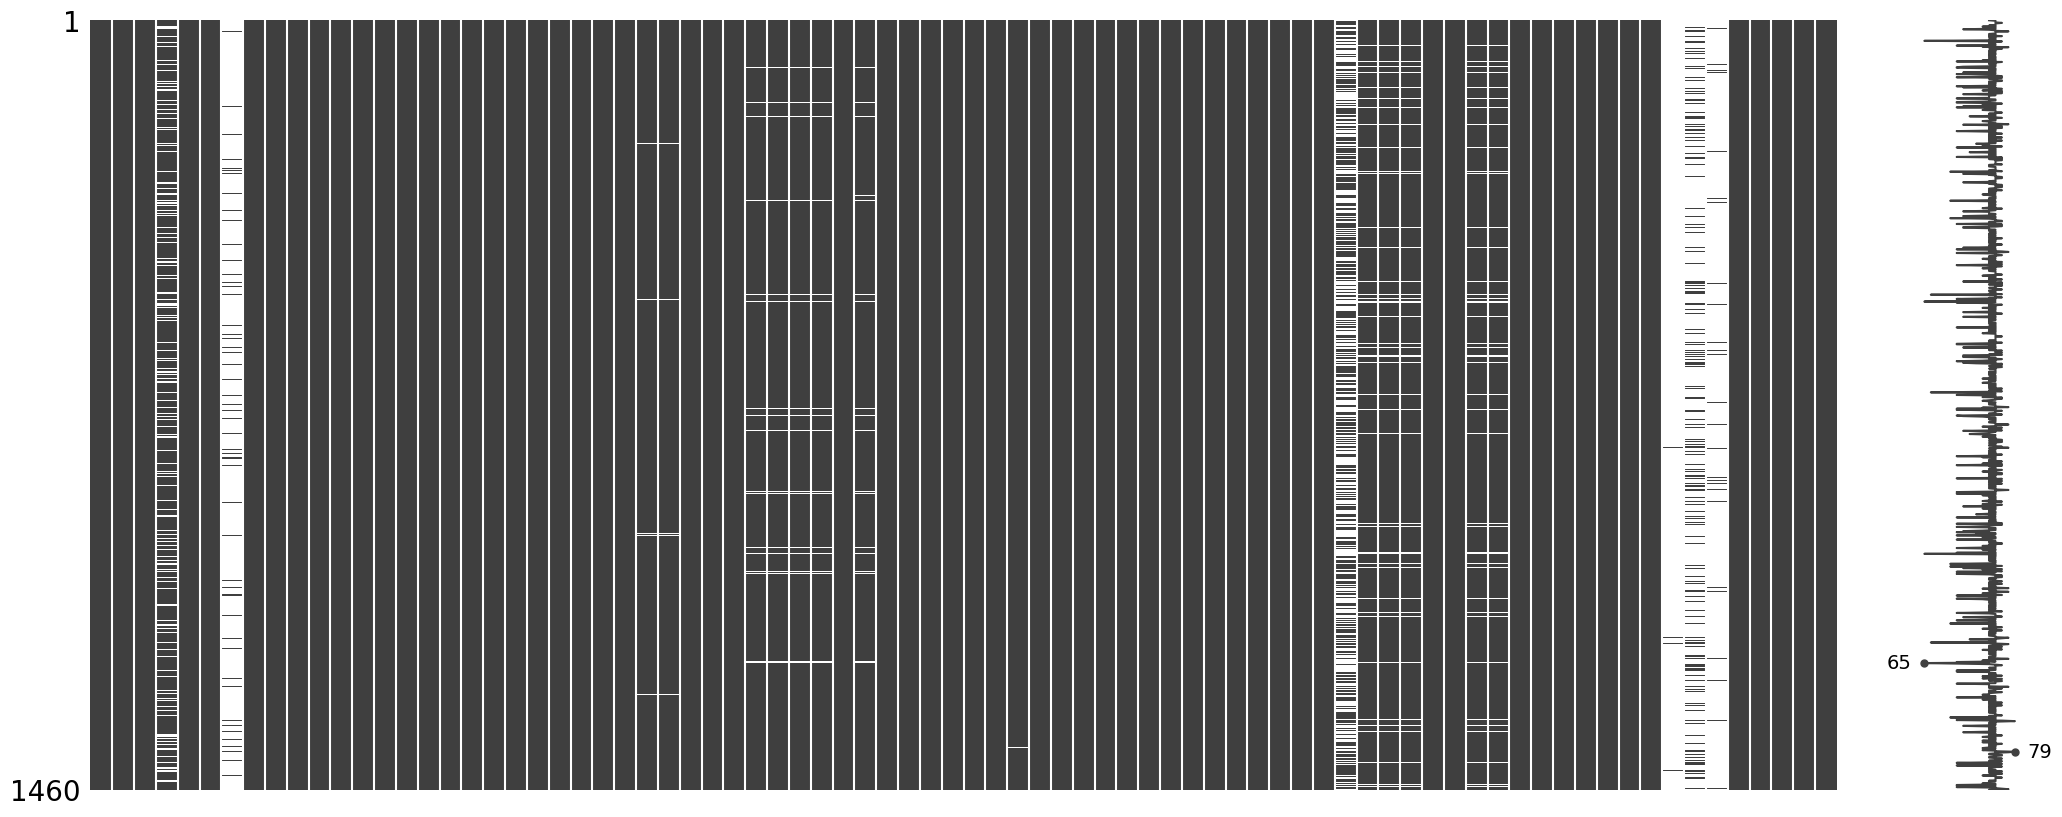

In [59]:
import missingno as msno
%matplotlib inline
msno.matrix(X)

In [60]:
#Looking for NaNs
isna=X.isna().sum()/X.shape[0]*100

In [61]:
isna[isna>0]

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

LotFrontage     17.739726   replace with int 0  
Alley           93.767123   replace with str no  
MasVnrType       0.547945   replace with str None  
MasVnrArea       0.547945   replace with int 0  
BsmtQual         2.534247   replace with str no  
BsmtCond         2.534247   replace with str no  
BsmtExposure     2.602740   replace with str no  
BsmtFinType1     2.534247   replace with str no  
BsmtFinType2     2.602740   replace with str no  
Electrical       0.068493   replace with str FuseF  
FireplaceQu     47.260274   replace with str no  
GarageType       5.547945   replace with str no  
GarageYrBlt      5.547945   replace with 0  
GarageFinish     5.547945   replace with str no  
GarageQual       5.547945   replace with str no  
GarageCond       5.547945   replace with str no  
PoolQC          99.520548   drop  
Fence           80.753425   replace with str no  
MiscFeature     96.301370   drop

In [62]:
#Dropping columns with too many NaNs
X = X.drop(columns=['PoolQC','MiscFeature','Id'])


In [63]:
test_df = test_df.drop(columns=['PoolQC','MiscFeature','Id'])

In [64]:

#Imputing values manually given the nature of the data for trining
X['LotFrontage']=X['LotFrontage'].fillna(0)
X['Alley']=X['BsmtQual'].fillna('no')
X['MasVnrType']=X['MasVnrType'].fillna('None')
X['MasVnrArea']=X['MasVnrArea'].fillna(0)
X['BsmtQual']=X['BsmtQual'].fillna('no')
X['BsmtCond']=X['BsmtCond'].fillna('no')
X['BsmtExposure']=X['BsmtExposure'].fillna('no')
X['BsmtFinType1']=X['BsmtFinType1'].fillna('no')
X['BsmtFinType2']=X['BsmtFinType2'].fillna('no')
X['Electrical']=X['Electrical'].fillna('FuseF')
X['FireplaceQu']=X['FireplaceQu'].fillna('no')
X['GarageType']=X['GarageType'].fillna('no')
X['GarageYrBlt']=X['GarageYrBlt'].fillna(0)
X['GarageFinish']=X['GarageFinish'].fillna('no')
X['GarageQual']=X['GarageQual'].fillna('no')
X['GarageCond']=X['GarageCond'].fillna('no')
X['Fence']=X['Fence'].fillna('no')


In [65]:
#Imputing values manually given the nature of the data for testing
test_df['LotFrontage']=test_df['LotFrontage'].fillna(0)
test_df['Alley']=test_df['BsmtQual'].fillna('no')
test_df['MasVnrType']=test_df['MasVnrType'].fillna('None')
test_df['MasVnrArea']=test_df['MasVnrArea'].fillna(0)
test_df['BsmtQual']=test_df['BsmtQual'].fillna('no')
test_df['BsmtCond']=test_df['BsmtCond'].fillna('no')
test_df['BsmtExposure']=test_df['BsmtExposure'].fillna('no')
test_df['BsmtFinType1']=test_df['BsmtFinType1'].fillna('no')
test_df['BsmtFinType2']=test_df['BsmtFinType2'].fillna('no')
test_df['Electrical']=test_df['Electrical'].fillna('FuseF')
test_df['FireplaceQu']=test_df['FireplaceQu'].fillna('no')
test_df['GarageType']=test_df['GarageType'].fillna('no')
test_df['GarageYrBlt']=test_df['GarageYrBlt'].fillna(0)
test_df['GarageFinish']=test_df['GarageFinish'].fillna('no')
test_df['GarageQual']=test_df['GarageQual'].fillna('no')
test_df['GarageCond']=test_df['GarageCond'].fillna('no')
test_df['Fence']=test_df['Fence'].fillna('no')

<AxesSubplot: >

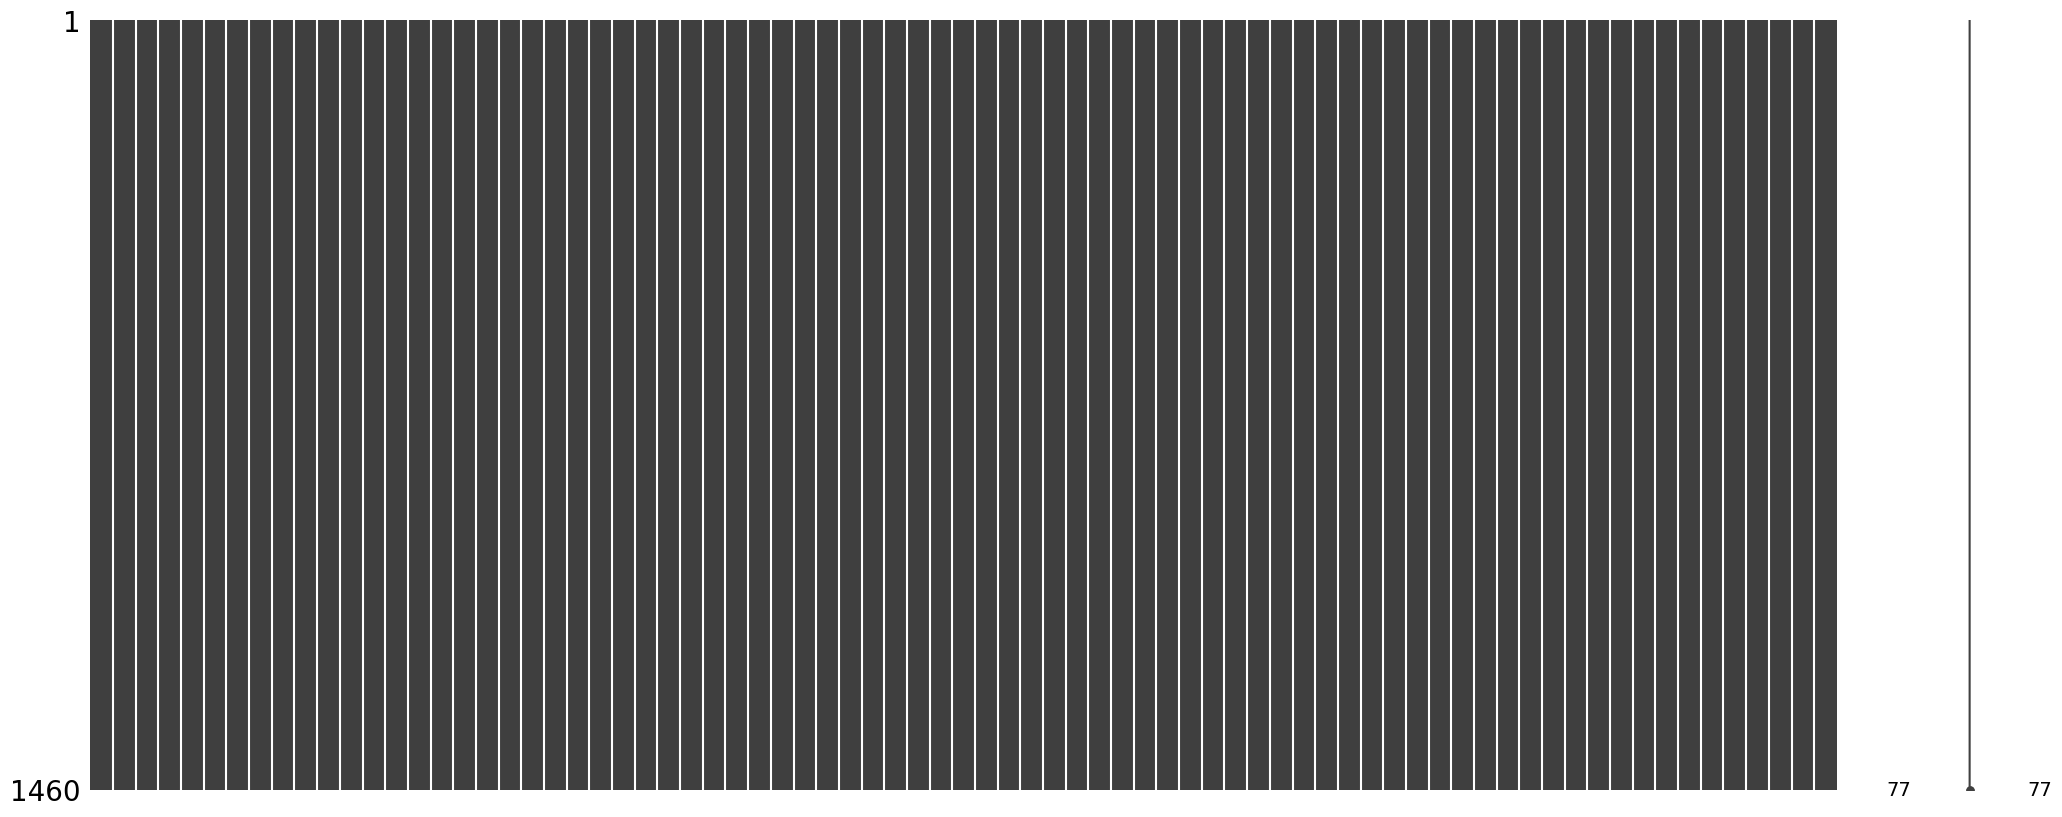

In [66]:
import missingno as msno
%matplotlib inline
msno.matrix(X)

#### Train / Test Split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2022)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1168, 77) (292, 77) (1168,) (292,)


In [68]:
numerical_features = X_train.select_dtypes(include='number').columns.tolist()
print(f"There are {len(numerical_features)} numerical features: {numerical_features}\n")

string_features = X_train.select_dtypes(exclude='number').columns.tolist()
print(f"There are {len(string_features)} string features: {string_features}\n")

There are 36 numerical features: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

There are 41 string features: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'Fire

#### Applying transformations

In [69]:
# Pipeline for numeric features
numeric_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scale', MinMaxScaler())
  ]
)

# Pipeline for string features
string_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('encode', OneHotEncoder(handle_unknown='ignore', sparse=False,drop='first')),
    ('scale', MinMaxScaler())
  ]
)

# Now let's merge both pipeline into one single pre-processing object
# We can use ColumnTransformer for this
full_processor = ColumnTransformer(transformers=[
    ('number', numeric_pipeline, numerical_features),
    ('string', string_pipeline, string_features)
  ]
)

In [70]:
X_train = full_processor.fit_transform(X_train)
X_test  = full_processor.transform(X_test)

print(X_train.shape, X_test.shape)

(1168, 249) (292, 249)


/home/manuelquiros/Documents/VENVS/KaggleTitanic/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/manuelquiros/Documents/VENVS/KaggleTitanic/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [10, 14, 16, 27, 31] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [71]:
test_df = full_processor.transform(test_df)
test_df.shape

/home/manuelquiros/Documents/VENVS/KaggleTitanic/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [10, 27, 31] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


(1459, 249)

In [72]:
enc_cat_features = full_processor.named_transformers_['string']['encode'].get_feature_names_out()

In [73]:
enc_cat_features

array(['x0_FV', 'x0_RH', 'x0_RL', 'x0_RM', 'x1_Pave', 'x2_Fa', 'x2_Gd',
       'x2_TA', 'x2_no', 'x3_IR2', 'x3_IR3', 'x3_Reg', 'x4_HLS', 'x4_Low',
       'x4_Lvl', 'x5_NoSeWa', 'x6_CulDSac', 'x6_FR2', 'x6_FR3',
       'x6_Inside', 'x7_Mod', 'x7_Sev', 'x8_Blueste', 'x8_BrDale',
       'x8_BrkSide', 'x8_ClearCr', 'x8_CollgCr', 'x8_Crawfor',
       'x8_Edwards', 'x8_Gilbert', 'x8_IDOTRR', 'x8_MeadowV',
       'x8_Mitchel', 'x8_NAmes', 'x8_NPkVill', 'x8_NWAmes', 'x8_NoRidge',
       'x8_NridgHt', 'x8_OldTown', 'x8_SWISU', 'x8_Sawyer', 'x8_SawyerW',
       'x8_Somerst', 'x8_StoneBr', 'x8_Timber', 'x8_Veenker', 'x9_Feedr',
       'x9_Norm', 'x9_PosA', 'x9_PosN', 'x9_RRAe', 'x9_RRAn', 'x9_RRNe',
       'x9_RRNn', 'x10_Feedr', 'x10_Norm', 'x10_PosN', 'x10_RRAe',
       'x10_RRAn', 'x10_RRNn', 'x11_2fmCon', 'x11_Duplex', 'x11_Twnhs',
       'x11_TwnhsE', 'x12_1.5Unf', 'x12_1Story', 'x12_2.5Fin',
       'x12_2.5Unf', 'x12_2Story', 'x12_SFoyer', 'x12_SLvl', 'x13_Gable',
       'x13_Gambrel', 'x13

#### Aplying PCA to num features

In [78]:
### Despues de normalizar y de onehotencodear !!!!!!!
pca = PCA(n_components=0.99)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
test_df_pca = pca.transform(test_df)
print(X_train_pca.shape, X_test_pca.shape,test_df_pca.shape)

(1168, 147) (292, 147) (1459, 147)


### Models

#### Baseline

In [38]:
LR = LinearRegression()
LR_p = LinearRegression()

In [39]:
LR.fit(X_train,y_train)

LinearRegression()

In [40]:
LR_p.fit(X_train_pca,y_train)

LinearRegression()

In [41]:
LR_train_pred=LR.predict(X_train)

In [42]:
LR_train_p_pred=LR_p.predict(X_train_pca)

In [43]:
print('MSE con PCA=' , mean_squared_error(y_train,LR_train_p_pred, squared=False))

MSE con PCA= 23248.61571120031


In [44]:
print('MSE sin PCA=' , mean_squared_error(y_train,LR_train_pred, squared=False))

MSE sin PCA= 19802.102659918233


In [46]:
LR_test_pred=LR.predict(X_test)

In [47]:
print('MSE test sin PCA=' , mean_squared_error(y_test,LR_test_pred, squared=False))

MSE test sin PCA= 39808.933549346555


#### Random Forest Regressor

In [79]:
from sklearn.ensemble import RandomForestRegressor

In [80]:
param_grid = {

    'max_depth': [None, 100],
    'max_features': [0.7,0.8,0.9],
    'min_samples_leaf': [3,  5],
    'min_samples_split': [8,12],
    'n_estimators': [100]
}
rf = RandomForestRegressor(criterion='squared_error')
grid_search_rf = GridSearchCV(rf, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 2)

In [81]:
grid_search_rf.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END max_depth=None, max_features=0.7, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   1.0s
[CV] END max_depth=None, max_features=0.7, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   1.0s
[CV] END max_depth=None, max_features=0.7, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   1.0s
[CV] END max_depth=None, max_features=0.7, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   0.9s
[CV] END max_depth=None, max_features=0.7, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   1.1s
[CV] END max_depth=None, max_features=0.7, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   1.1s
[CV] END max_depth=None, max_features=0.7, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   1.0s
[CV] END max_depth=None, max_features=0.7, min_samples_leaf=3, min_samples_split=8, n_es

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 100],
                         'max_features': [0.7, 0.8, 0.9],
                         'min_samples_leaf': [3, 5],
                         'min_samples_split': [8, 12], 'n_estimators': [100]},
             verbose=2)

In [82]:
grid_search_rf.best_estimator_

RandomForestRegressor(max_depth=100, max_features=0.7, min_samples_leaf=3,
                      min_samples_split=12)

In [83]:
y_train_pred_gs_rf=grid_search_rf.predict(X_train)
y_test_pred_gs_rf=grid_search_rf.predict(X_test)
print('MSE train RandomForest=' , mean_squared_error(y_train,y_train_pred_gs_rf, squared=False))
print('MSE test RandomForest=' , mean_squared_error(y_test,y_test_pred_gs_rf, squared=False))

MSE train RandomForest= 19297.02769236155
MSE test RandomForest= 28041.868987833263


In [84]:
#RF = RandomForestRegressor(max_depth=100, max_features=0.7, min_samples_leaf=3,min_samples_split=8)
RF = grid_search_rf.best_estimator_

In [85]:
RF.feature_importances_

array([1.98694012e-03, 4.45905054e-03, 1.21258252e-02, 4.59674136e-01,
       3.18195741e-03, 2.23164687e-02, 8.03771261e-03, 3.47874292e-03,
       2.43841627e-02, 0.00000000e+00, 3.76927033e-03, 4.12400222e-02,
       2.97815294e-02, 1.68345493e-02, 0.00000000e+00, 1.31538024e-01,
       4.23101598e-04, 0.00000000e+00, 1.00496382e-02, 1.04405437e-03,
       2.95463634e-03, 0.00000000e+00, 5.40876216e-03, 6.65964205e-03,
       5.41204252e-03, 1.06778028e-01, 2.36449341e-02, 4.22914785e-03,
       2.49471819e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.24888350e-03, 7.74927942e-04,
       4.53392961e-05, 2.99791493e-06, 5.28120542e-04, 8.88728073e-04,
       0.00000000e+00, 1.67293480e-05, 2.06659867e-03, 3.73549200e-04,
       1.46779769e-05, 0.00000000e+00, 0.00000000e+00, 4.94333832e-04,
       3.17261971e-04, 2.02996515e-04, 1.26601863e-03, 0.00000000e+00,
       2.68749326e-04, 4.28995626e-06, 0.00000000e+00, 2.78777672e-04,
      

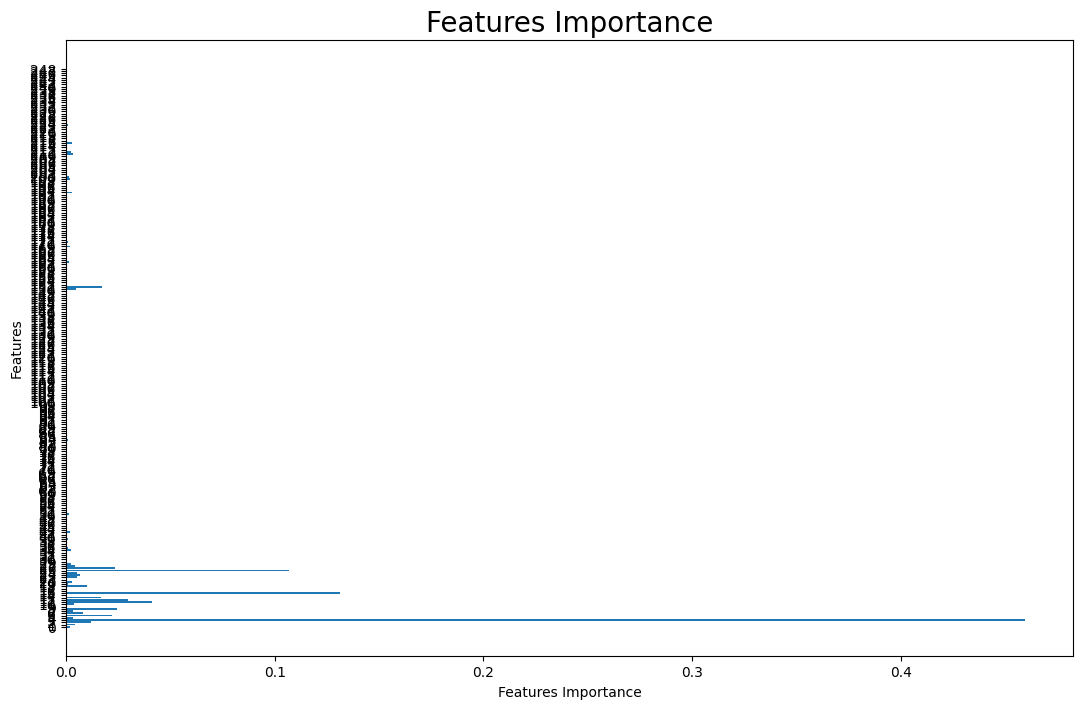

In [86]:
plt.figure(figsize=(13, 8))
caract = X_train.shape[1]
plt.barh(range(caract), RF.feature_importances_)
plt.yticks(np.arange(caract)) #,X_train.columns)
plt.xlabel('Features Importance')
plt.ylabel('Features')
plt.title('Features Importance', fontsize=20)
plt.show()

In [89]:
RF.feature_importances_[RF.feature_importances_>0.0005]

array([0.00198694, 0.00445905, 0.01212583, 0.45967414, 0.00318196,
       0.02231647, 0.00803771, 0.00347874, 0.02438416, 0.00376927,
       0.04124002, 0.02978153, 0.01683455, 0.13153802, 0.01004964,
       0.00104405, 0.00295464, 0.00540876, 0.00665964, 0.00541204,
       0.10677803, 0.02364493, 0.00422915, 0.00249472, 0.00224888,
       0.00077493, 0.00052812, 0.00088873, 0.0020666 , 0.00126602,
       0.00062269, 0.00100737, 0.00063664, 0.004917  , 0.01735188,
       0.00158842, 0.00058824, 0.00191927, 0.00079889, 0.00051117,
       0.00282465, 0.00172725, 0.00171418, 0.00059587, 0.0035902 ,
       0.00224952, 0.00293848, 0.00059676, 0.00062159, 0.00095517])

In [90]:
feat_mask = RF.feature_importances_>0.0005

In [91]:
feat_mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True, False,  True, False, False,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False, False,  True,  True,
       False, False,  True,  True, False, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [92]:
X_train[:,feat_mask]

array([[0.32      , 0.62780269, 0.59921566, ..., 1.        , 0.        ,
        1.        ],
       [0.32      , 0.62780269, 0.60063612, ..., 0.        , 0.        ,
        1.        ],
       [0.8       , 0.        , 0.18240489, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.        , 0.71748879, 0.53825963, ..., 0.        , 1.        ,
        1.        ],
       [0.4       , 0.        , 0.61471714, ..., 0.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.72890934, ..., 0.        , 1.        ,
        1.        ]])

In [93]:
RF.fit(X_train[:,feat_mask],y_train)

RandomForestRegressor(max_depth=100, max_features=0.7, min_samples_leaf=3,
                      min_samples_split=12)

In [94]:
y_train_pred_rf=grid_search_rf.predict(X_train[:,feat_mask])

In [95]:
y_test_pred_rf=grid_search_rf.predict(X_test[:,feat_mask])

In [96]:
print('MSE train RandomForest=' , mean_squared_error(y_train,y_train_pred_rf, squared=False))

MSE train RandomForest= 19801.034767509904


In [97]:
print('MSE test RandomForest=' , mean_squared_error(y_test,y_test_pred_rf, squared=False))

MSE test RandomForest= 27970.65799914637


#### XGboost

In [86]:
from xgboost import XGBRegressor
from sklearn.metrics import make_scorer

In [87]:
param_dist = {
    'n_estimators':[5,6,7,8],
    'max_depth':[20,30,35], 
    'learning_rate':[0.3,0.4,0.5],
    }
#Create the lgbm moodel object
bst = XGBRegressor(reg_lambda=2,reg_alpha=1)
#Create the GridSearch object
bst_grid = GridSearchCV(bst, param_dist,cv = 5, n_jobs = -1, verbose = 2)

In [88]:
bst_grid.fit(X_train[:,feat_mask],y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END ....learning_rate=0.3, max_depth=20, n_estimators=5; total time=   0.0s
[CV] END ....learning_rate=0.3, max_depth=20, n_estimators=5; total time=   0.0s
[CV] END ....learning_rate=0.3, max_depth=20, n_estimators=5; total time=   0.0s
[CV] END ....learning_rate=0.3, max_depth=20, n_estimators=5; total time=   0.0s
[CV] END ....learning_rate=0.3, max_depth=20, n_estimators=5; total time=   0.0s
[CV] END ....learning_rate=0.3, max_depth=20, n_estimators=6; total time=   0.0s
[CV] END ....learning_rate=0.3, max_depth=20, n_estimators=6; total time=   0.0s
[CV] END ....learning_rate=0.3, max_depth=20, n_estimators=6; total time=   0.0s
[CV] END ....learning_rate=0.3, max_depth=20, n_estimators=6; total time=   0.0s
[CV] END ....learning_rate=0.3, max_depth=20, n_estimators=7; total time=   0.1s[CV] END ....learning_rate=0.3, max_depth=20, n_estimators=6; total time=   0.1s[CV] END ....learning_rate=0.3, max_depth=20, n_e

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.4, 0.5],
                         'max_depth': [20, 30, 35],
                         'n_estimators': [5, 6, 7, 8]},
             verbose=2)

In [256]:
bst_grid.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=35, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=8, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [288]:
bst_grid.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=20, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=8, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [89]:
bst_train_pred=bst_grid.predict(X_train[:,feat_mask])
bst_test_pred=bst_grid.predict(X_test[:,feat_mask])

In [90]:
print('MSE train XGBoost=' , mean_squared_error(y_train,bst_train_pred, squared=False))
print('MSE test XGBoost=' , mean_squared_error(y_test,bst_test_pred, squared=False))

MSE train XGBoost= 6333.4755598527145
MSE test XGBoost= 29131.49604538569


In [241]:
bst_train_pred2=bst_grid2.predict(X_train)
bst_test_pred2=bst_grid2.predict(X_test)
print('MSE2 train XGBoost=' , mean_squared_error(y_train,bst_train_pred2, squared=False))
print('MSE2 test XGBoost=' , mean_squared_error(y_test,bst_test_pred2, squared=False))

MSE2 train XGBoost= 8011.072273200967
MSE2 test XGBoost= 31303.222218650364


In [91]:
print('MSE train XGBoost con 45 features de acuerdo a la improtancia en randomforest=' , mean_squared_error(y_train,bst_train_pred, squared=False))
print('MSE test XGBoost con 45 features de acuerdo a la improtancia en randomforest=' , mean_squared_error(y_test,bst_test_pred, squared=False))

MSE train XGBoost con 45 features de acuerdo a la improtancia en randomforest= 6333.4755598527145
MSE test XGBoost con 45 features de acuerdo a la improtancia en randomforest= 29131.49604538569


#### MLP with keras tuner

In [105]:
from tensorflow import keras
from tensorflow.keras import layers
from keras_tuner import Hyperband

In [99]:
X_train[:,feat_mask].shape

(1168, 50)

In [98]:
input_shape=X_train[:,feat_mask].shape[1]

In [118]:
def model_builder(hp):
  model = keras.Sequential()
  model.add(layers.Input(shape=input_shape))
  #model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

  # Tune the number of dense layers
  for i in range(hp.Int('num_layers', 1, 10)):
    
    # Tune the number of units in the each dense layer
    hp_units = hp.Int('units_'+str(i), min_value=32, max_value=512, step=16)
    model.add(keras.layers.Dense(units=hp_units, activation='relu'))
    
    # Tune the dropout rate in the each dense layer
    hp_dropout = hp.Float('rate', min_value=0.0, max_value=0.5, step=0.1)
    model.add(keras.layers.Dropout(hp_dropout))
    
  # Add dense output layer
  model.add(keras.layers.Dense(1))

  # Tune the learning rate for the optimizer
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4, 1e-5,1e-6])
  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss='mse',
                metrics=[keras.metrics.MeanSquaredError()])

  return model

In [119]:
tuner = Hyperband(model_builder,
objective='val_mean_squared_error',
max_epochs=10,
factor=3,
directory='mlp_keras_tuner',
project_name='cuanto_salen_las_casitas',
overwrite=True)

In [120]:
# Optimize the hyperparameter search for hypermodel
tuner.search(X_train[:,feat_mask], y_train, epochs=100, validation_split=0.2)

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

Trial 30 Complete [00h 00m 02s]
val_mean_squared_error: 38548905984.0

Best val_mean_squared_error So Far: 637510976.0
Total elapsed time: 00h 01m 18s
INFO:tensorflow:Oracle triggered exit


In [ ]:
model = tuner.hypermodel.build(best_hps)

In [122]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 736)               37536     
                                                                 
 dropout_1 (Dropout)         (None, 736)               0         
                                                                 
 dense_3 (Dense)             (None, 640)               471680    
                                                                 
 dropout_2 (Dropout)         (None, 640)               0         
                                                                 
 dense_4 (Dense)             (None, 576)               369216    
                                                                 
 dropout_3 (Dropout)         (None, 576)               0         
                                                                 
 dense_5 (Dense)             (None, 672)              

In [125]:
cp2 = keras.callbacks.ModelCheckpoint('/home/manuelquiros/Documents/Kaggle/House_Prices/mlp_keras_tuner', save_best_only=True)
log_dir2 = "mlp_keras_tuner/logs/fit/"
tb2 = keras.callbacks.TensorBoard(log_dir=log_dir2, histogram_freq=1)
es2 = keras.callbacks.EarlyStopping(monitor='root_mean_squared_error', patience=30)
lr = keras.callbacks.ReduceLROnPlateau(monitor='root_mean_squared_error', factor=0.2,patience=15, min_lr=0.00000001)

In [126]:
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
history = model.fit(X_train[:,feat_mask], y_train, epochs=100, validation_split=0.2, callbacks=[cp2,lr,tb2])

Epoch 1/100
28/30 [===========================>..] - ETA: 0s - loss: 2871169792.0000 - mean_squared_error: 2871169792.0000

2023-04-17 10:36:08.597335: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,736]
	 [[{{node inputs}}]]
2023-04-17 10:36:08.609197: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,640]
	 [[{{node inputs}}]]
2023-04-17 10:36:08.622546: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,576]
	 [[{{node inputs}}]]
2023-04-17 10:36

INFO:tensorflow:Assets written to: /home/manuelquiros/Documents/Kaggle/House_Prices/mlp_keras_tuner/assets


INFO:tensorflow:Assets written to: /home/manuelquiros/Documents/Kaggle/House_Prices/mlp_keras_tuner/assets


30/30 [==============================] - 1s 44ms/step - loss: 2777112576.0000 - mean_squared_error: 2777112576.0000 - val_loss: 1440403200.0000 - val_mean_squared_error: 1440403200.0000 - lr: 0.0100
Epoch 2/100
27/30 [==========================>...] - ETA: 0s - loss: 736851968.0000 - mean_squared_error: 736851968.0000

2023-04-17 10:36:09.781369: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,736]
	 [[{{node inputs}}]]
2023-04-17 10:36:09.793325: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,640]
	 [[{{node inputs}}]]
2023-04-17 10:36:09.805946: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,576]
	 [[{{node inputs}}]]
2023-04-17 10:36

INFO:tensorflow:Assets written to: /home/manuelquiros/Documents/Kaggle/House_Prices/mlp_keras_tuner/assets


INFO:tensorflow:Assets written to: /home/manuelquiros/Documents/Kaggle/House_Prices/mlp_keras_tuner/assets


30/30 [==============================] - 1s 35ms/step - loss: 732206208.0000 - mean_squared_error: 732206208.0000 - val_loss: 845799552.0000 - val_mean_squared_error: 845799552.0000 - lr: 0.0100
Epoch 3/100
26/30 [=========================>....] - ETA: 0s - loss: 532105920.0000 - mean_squared_error: 532105920.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 11ms/step - loss: 517263328.0000 - mean_squared_error: 517263328.0000 - val_loss: 993443968.0000 - val_mean_squared_error: 993443968.0000 - lr: 0.0100
Epoch 4/100
25/30 [========================>.....] - ETA: 0s - loss: 606586624.0000 - mean_squared_error: 606586624.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 11ms/step - loss: 598085184.0000 - mean_squared_error: 598085184.0000 - val_loss: 951141760.0000 - val_mean_squared_error: 951141760.0000 - lr: 0.0100
Epoch 5/100
26/30 [=========================>....] - ETA: 0s - loss: 356300128.0000 - mean_squared_error: 356300128.0000

2023-04-17 10:36:11.406871: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,736]
	 [[{{node inputs}}]]
2023-04-17 10:36:11.418683: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,640]
	 [[{{node inputs}}]]
2023-04-17 10:36:11.426880: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,576]
	 [[{{node inputs}}]]
2023-04-17 10:36

INFO:tensorflow:Assets written to: /home/manuelquiros/Documents/Kaggle/House_Prices/mlp_keras_tuner/assets


INFO:tensorflow:Assets written to: /home/manuelquiros/Documents/Kaggle/House_Prices/mlp_keras_tuner/assets


30/30 [==============================] - 1s 32ms/step - loss: 362434752.0000 - mean_squared_error: 362434752.0000 - val_loss: 792911424.0000 - val_mean_squared_error: 792911424.0000 - lr: 0.0100
Epoch 6/100
26/30 [=========================>....] - ETA: 0s - loss: 618436224.0000 - mean_squared_error: 618436224.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 11ms/step - loss: 594750272.0000 - mean_squared_error: 594750272.0000 - val_loss: 919857856.0000 - val_mean_squared_error: 919857856.0000 - lr: 0.0100
Epoch 7/100
24/30 [=======================>......] - ETA: 0s - loss: 485886112.0000 - mean_squared_error: 485886112.0000

2023-04-17 10:36:12.713248: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,736]
	 [[{{node inputs}}]]
2023-04-17 10:36:12.723875: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,640]
	 [[{{node inputs}}]]
2023-04-17 10:36:12.736118: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,576]
	 [[{{node inputs}}]]
2023-04-17 10:36

INFO:tensorflow:Assets written to: /home/manuelquiros/Documents/Kaggle/House_Prices/mlp_keras_tuner/assets


INFO:tensorflow:Assets written to: /home/manuelquiros/Documents/Kaggle/House_Prices/mlp_keras_tuner/assets


30/30 [==============================] - 1s 44ms/step - loss: 461197664.0000 - mean_squared_error: 461197664.0000 - val_loss: 678435456.0000 - val_mean_squared_error: 678435456.0000 - lr: 0.0100
Epoch 8/100
28/30 [===========================>..] - ETA: 0s - loss: 644522880.0000 - mean_squared_error: 644522880.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 10ms/step - loss: 660182784.0000 - mean_squared_error: 660182784.0000 - val_loss: 1038501440.0000 - val_mean_squared_error: 1038501440.0000 - lr: 0.0100
Epoch 9/100
25/30 [========================>.....] - ETA: 0s - loss: 515165824.0000 - mean_squared_error: 515165824.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 11ms/step - loss: 479768416.0000 - mean_squared_error: 479768416.0000 - val_loss: 773540096.0000 - val_mean_squared_error: 773540096.0000 - lr: 0.0100
Epoch 10/100
25/30 [========================>.....] - ETA: 0s - loss: 424168064.0000 - mean_squared_error: 424168064.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 12ms/step - loss: 423686400.0000 - mean_squared_error: 423686400.0000 - val_loss: 1024411968.0000 - val_mean_squared_error: 1024411968.0000 - lr: 0.0100
Epoch 11/100
25/30 [========================>.....] - ETA: 0s - loss: 463946464.0000 - mean_squared_error: 463946464.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 11ms/step - loss: 449673184.0000 - mean_squared_error: 449673184.0000 - val_loss: 698680960.0000 - val_mean_squared_error: 698680960.0000 - lr: 0.0100
Epoch 12/100
26/30 [=========================>....] - ETA: 0s - loss: 498604896.0000 - mean_squared_error: 498604896.0000

2023-04-17 10:36:15.272717: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,736]
	 [[{{node inputs}}]]
2023-04-17 10:36:15.281814: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,640]
	 [[{{node inputs}}]]
2023-04-17 10:36:15.290956: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,576]
	 [[{{node inputs}}]]
2023-04-17 10:36

INFO:tensorflow:Assets written to: /home/manuelquiros/Documents/Kaggle/House_Prices/mlp_keras_tuner/assets


INFO:tensorflow:Assets written to: /home/manuelquiros/Documents/Kaggle/House_Prices/mlp_keras_tuner/assets


30/30 [==============================] - 1s 32ms/step - loss: 516196640.0000 - mean_squared_error: 516196640.0000 - val_loss: 632406976.0000 - val_mean_squared_error: 632406976.0000 - lr: 0.0100
Epoch 13/100
26/30 [=========================>....] - ETA: 0s - loss: 670495616.0000 - mean_squared_error: 670495616.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 11ms/step - loss: 637376960.0000 - mean_squared_error: 637376960.0000 - val_loss: 787162880.0000 - val_mean_squared_error: 787162880.0000 - lr: 0.0100
Epoch 14/100
26/30 [=========================>....] - ETA: 0s - loss: 392564288.0000 - mean_squared_error: 392564288.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 11ms/step - loss: 381638592.0000 - mean_squared_error: 381638592.0000 - val_loss: 929530176.0000 - val_mean_squared_error: 929530176.0000 - lr: 0.0100
Epoch 15/100
28/30 [===========================>..] - ETA: 0s - loss: 352072544.0000 - mean_squared_error: 352072544.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 10ms/step - loss: 353499488.0000 - mean_squared_error: 353499488.0000 - val_loss: 642120896.0000 - val_mean_squared_error: 642120896.0000 - lr: 0.0100
Epoch 16/100
26/30 [=========================>....] - ETA: 0s - loss: 442878016.0000 - mean_squared_error: 442878016.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 11ms/step - loss: 440994720.0000 - mean_squared_error: 440994720.0000 - val_loss: 739439680.0000 - val_mean_squared_error: 739439680.0000 - lr: 0.0100
Epoch 17/100
28/30 [===========================>..] - ETA: 0s - loss: 359131296.0000 - mean_squared_error: 359131296.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 10ms/step - loss: 358956032.0000 - mean_squared_error: 358956032.0000 - val_loss: 783303424.0000 - val_mean_squared_error: 783303424.0000 - lr: 0.0100
Epoch 18/100
28/30 [===========================>..] - ETA: 0s - loss: 353651040.0000 - mean_squared_error: 353651040.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 11ms/step - loss: 348438688.0000 - mean_squared_error: 348438688.0000 - val_loss: 656545728.0000 - val_mean_squared_error: 656545728.0000 - lr: 0.0100
Epoch 19/100
27/30 [==========================>...] - ETA: 0s - loss: 481702112.0000 - mean_squared_error: 481702112.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 11ms/step - loss: 470311712.0000 - mean_squared_error: 470311712.0000 - val_loss: 853918656.0000 - val_mean_squared_error: 853918656.0000 - lr: 0.0100
Epoch 20/100
27/30 [==========================>...] - ETA: 0s - loss: 370606656.0000 - mean_squared_error: 370606656.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 10ms/step - loss: 366909952.0000 - mean_squared_error: 366909952.0000 - val_loss: 771720000.0000 - val_mean_squared_error: 771720000.0000 - lr: 0.0100
Epoch 21/100
28/30 [===========================>..] - ETA: 0s - loss: 384551872.0000 - mean_squared_error: 384551872.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 11ms/step - loss: 381445952.0000 - mean_squared_error: 381445952.0000 - val_loss: 740963968.0000 - val_mean_squared_error: 740963968.0000 - lr: 0.0100
Epoch 22/100
25/30 [========================>.....] - ETA: 0s - loss: 491339168.0000 - mean_squared_error: 491339168.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 11ms/step - loss: 463403488.0000 - mean_squared_error: 463403488.0000 - val_loss: 945150656.0000 - val_mean_squared_error: 945150656.0000 - lr: 0.0100
Epoch 23/100
26/30 [=========================>....] - ETA: 0s - loss: 391295360.0000 - mean_squared_error: 391295360.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 11ms/step - loss: 378213728.0000 - mean_squared_error: 378213728.0000 - val_loss: 648176768.0000 - val_mean_squared_error: 648176768.0000 - lr: 0.0100
Epoch 24/100
28/30 [===========================>..] - ETA: 0s - loss: 375059648.0000 - mean_squared_error: 375059648.0000

2023-04-17 10:36:19.707763: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,736]
	 [[{{node inputs}}]]
2023-04-17 10:36:19.718445: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,640]
	 [[{{node inputs}}]]
2023-04-17 10:36:19.726761: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,576]
	 [[{{node inputs}}]]
2023-04-17 10:36

INFO:tensorflow:Assets written to: /home/manuelquiros/Documents/Kaggle/House_Prices/mlp_keras_tuner/assets


INFO:tensorflow:Assets written to: /home/manuelquiros/Documents/Kaggle/House_Prices/mlp_keras_tuner/assets


30/30 [==============================] - 1s 32ms/step - loss: 375557760.0000 - mean_squared_error: 375557760.0000 - val_loss: 608222784.0000 - val_mean_squared_error: 608222784.0000 - lr: 0.0100
Epoch 25/100
28/30 [===========================>..] - ETA: 0s - loss: 348708864.0000 - mean_squared_error: 348708864.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 11ms/step - loss: 342600288.0000 - mean_squared_error: 342600288.0000 - val_loss: 677975232.0000 - val_mean_squared_error: 677975232.0000 - lr: 0.0100
Epoch 26/100
26/30 [=========================>....] - ETA: 0s - loss: 303648736.0000 - mean_squared_error: 303648736.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 11ms/step - loss: 298571200.0000 - mean_squared_error: 298571200.0000 - val_loss: 809981440.0000 - val_mean_squared_error: 809981440.0000 - lr: 0.0100
Epoch 27/100
26/30 [=========================>....] - ETA: 0s - loss: 398051968.0000 - mean_squared_error: 398051968.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 11ms/step - loss: 404121536.0000 - mean_squared_error: 404121536.0000 - val_loss: 724049920.0000 - val_mean_squared_error: 724049920.0000 - lr: 0.0100
Epoch 28/100
22/30 [=====================>........] - ETA: 0s - loss: 448568832.0000 - mean_squared_error: 448568832.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 11ms/step - loss: 426432672.0000 - mean_squared_error: 426432672.0000 - val_loss: 907818048.0000 - val_mean_squared_error: 907818048.0000 - lr: 0.0100
Epoch 29/100
27/30 [==========================>...] - ETA: 0s - loss: 331486592.0000 - mean_squared_error: 331486592.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 11ms/step - loss: 325926304.0000 - mean_squared_error: 325926304.0000 - val_loss: 899327424.0000 - val_mean_squared_error: 899327424.0000 - lr: 0.0100
Epoch 30/100
28/30 [===========================>..] - ETA: 0s - loss: 491552192.0000 - mean_squared_error: 491552192.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 10ms/step - loss: 480551904.0000 - mean_squared_error: 480551904.0000 - val_loss: 1307091456.0000 - val_mean_squared_error: 1307091456.0000 - lr: 0.0100
Epoch 31/100
27/30 [==========================>...] - ETA: 0s - loss: 352260704.0000 - mean_squared_error: 352260704.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 10ms/step - loss: 364624928.0000 - mean_squared_error: 364624928.0000 - val_loss: 799085568.0000 - val_mean_squared_error: 799085568.0000 - lr: 0.0100
Epoch 32/100
27/30 [==========================>...] - ETA: 0s - loss: 390556480.0000 - mean_squared_error: 390556480.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 10ms/step - loss: 385908736.0000 - mean_squared_error: 385908736.0000 - val_loss: 789864384.0000 - val_mean_squared_error: 789864384.0000 - lr: 0.0100
Epoch 33/100
27/30 [==========================>...] - ETA: 0s - loss: 502638432.0000 - mean_squared_error: 502638432.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 11ms/step - loss: 478946144.0000 - mean_squared_error: 478946144.0000 - val_loss: 808783808.0000 - val_mean_squared_error: 808783808.0000 - lr: 0.0100
Epoch 34/100
28/30 [===========================>..] - ETA: 0s - loss: 330608992.0000 - mean_squared_error: 330608992.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 11ms/step - loss: 326646208.0000 - mean_squared_error: 326646208.0000 - val_loss: 862619392.0000 - val_mean_squared_error: 862619392.0000 - lr: 0.0100
Epoch 35/100
25/30 [========================>.....] - ETA: 0s - loss: 277840064.0000 - mean_squared_error: 277840064.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 11ms/step - loss: 295077824.0000 - mean_squared_error: 295077824.0000 - val_loss: 1232413696.0000 - val_mean_squared_error: 1232413696.0000 - lr: 0.0100
Epoch 36/100
25/30 [========================>.....] - ETA: 0s - loss: 330613440.0000 - mean_squared_error: 330613440.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 11ms/step - loss: 339141472.0000 - mean_squared_error: 339141472.0000 - val_loss: 934875328.0000 - val_mean_squared_error: 934875328.0000 - lr: 0.0100
Epoch 37/100
28/30 [===========================>..] - ETA: 0s - loss: 310918464.0000 - mean_squared_error: 310918464.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 10ms/step - loss: 310902688.0000 - mean_squared_error: 310902688.0000 - val_loss: 747551552.0000 - val_mean_squared_error: 747551552.0000 - lr: 0.0100
Epoch 38/100
28/30 [===========================>..] - ETA: 0s - loss: 376258528.0000 - mean_squared_error: 376258528.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 10ms/step - loss: 371870304.0000 - mean_squared_error: 371870304.0000 - val_loss: 686239552.0000 - val_mean_squared_error: 686239552.0000 - lr: 0.0100
Epoch 39/100
25/30 [========================>.....] - ETA: 0s - loss: 461906976.0000 - mean_squared_error: 461906976.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 11ms/step - loss: 444352768.0000 - mean_squared_error: 444352768.0000 - val_loss: 677157632.0000 - val_mean_squared_error: 677157632.0000 - lr: 0.0100
Epoch 40/100
25/30 [========================>.....] - ETA: 0s - loss: 326898432.0000 - mean_squared_error: 326898432.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 12ms/step - loss: 333853824.0000 - mean_squared_error: 333853824.0000 - val_loss: 700696832.0000 - val_mean_squared_error: 700696832.0000 - lr: 0.0100
Epoch 41/100
24/30 [=======================>......] - ETA: 0s - loss: 346287872.0000 - mean_squared_error: 346287872.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 12ms/step - loss: 352205408.0000 - mean_squared_error: 352205408.0000 - val_loss: 646373184.0000 - val_mean_squared_error: 646373184.0000 - lr: 0.0100
Epoch 42/100
25/30 [========================>.....] - ETA: 0s - loss: 646967104.0000 - mean_squared_error: 646967104.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 11ms/step - loss: 602031296.0000 - mean_squared_error: 602031296.0000 - val_loss: 778461952.0000 - val_mean_squared_error: 778461952.0000 - lr: 0.0100
Epoch 43/100
28/30 [===========================>..] - ETA: 0s - loss: 332009056.0000 - mean_squared_error: 332009056.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 10ms/step - loss: 346978400.0000 - mean_squared_error: 346978400.0000 - val_loss: 888106176.0000 - val_mean_squared_error: 888106176.0000 - lr: 0.0100
Epoch 44/100
26/30 [=========================>....] - ETA: 0s - loss: 381226144.0000 - mean_squared_error: 381226144.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 11ms/step - loss: 375284608.0000 - mean_squared_error: 375284608.0000 - val_loss: 785592896.0000 - val_mean_squared_error: 785592896.0000 - lr: 0.0100
Epoch 45/100
27/30 [==========================>...] - ETA: 0s - loss: 315845440.0000 - mean_squared_error: 315845440.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 11ms/step - loss: 342767456.0000 - mean_squared_error: 342767456.0000 - val_loss: 1380280960.0000 - val_mean_squared_error: 1380280960.0000 - lr: 0.0100
Epoch 46/100
26/30 [=========================>....] - ETA: 0s - loss: 491188448.0000 - mean_squared_error: 491188448.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 11ms/step - loss: 476254432.0000 - mean_squared_error: 476254432.0000 - val_loss: 717216960.0000 - val_mean_squared_error: 717216960.0000 - lr: 0.0100
Epoch 47/100
28/30 [===========================>..] - ETA: 0s - loss: 505704160.0000 - mean_squared_error: 505704160.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 10ms/step - loss: 492405504.0000 - mean_squared_error: 492405504.0000 - val_loss: 1429683968.0000 - val_mean_squared_error: 1429683968.0000 - lr: 0.0100
Epoch 48/100
27/30 [==========================>...] - ETA: 0s - loss: 437457184.0000 - mean_squared_error: 437457184.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 11ms/step - loss: 427666816.0000 - mean_squared_error: 427666816.0000 - val_loss: 820168256.0000 - val_mean_squared_error: 820168256.0000 - lr: 0.0100
Epoch 49/100
25/30 [========================>.....] - ETA: 0s - loss: 440944000.0000 - mean_squared_error: 440944000.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 11ms/step - loss: 428956864.0000 - mean_squared_error: 428956864.0000 - val_loss: 1202355328.0000 - val_mean_squared_error: 1202355328.0000 - lr: 0.0100
Epoch 50/100
30/30 [==============================] - ETA: 0s - loss: 336005696.0000 - mean_squared_error: 336005696.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 13ms/step - loss: 336005696.0000 - mean_squared_error: 336005696.0000 - val_loss: 802016128.0000 - val_mean_squared_error: 802016128.0000 - lr: 0.0100
Epoch 51/100
25/30 [========================>.....] - ETA: 0s - loss: 352056000.0000 - mean_squared_error: 352056000.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 11ms/step - loss: 338013312.0000 - mean_squared_error: 338013312.0000 - val_loss: 744881344.0000 - val_mean_squared_error: 744881344.0000 - lr: 0.0100
Epoch 52/100
26/30 [=========================>....] - ETA: 0s - loss: 325011648.0000 - mean_squared_error: 325011648.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 11ms/step - loss: 328321472.0000 - mean_squared_error: 328321472.0000 - val_loss: 1020616576.0000 - val_mean_squared_error: 1020616576.0000 - lr: 0.0100
Epoch 53/100
24/30 [=======================>......] - ETA: 0s - loss: 486492128.0000 - mean_squared_error: 486492128.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 11ms/step - loss: 471381632.0000 - mean_squared_error: 471381632.0000 - val_loss: 861693696.0000 - val_mean_squared_error: 861693696.0000 - lr: 0.0100
Epoch 54/100
25/30 [========================>.....] - ETA: 0s - loss: 304008000.0000 - mean_squared_error: 304008000.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 11ms/step - loss: 303399904.0000 - mean_squared_error: 303399904.0000 - val_loss: 824052032.0000 - val_mean_squared_error: 824052032.0000 - lr: 0.0100
Epoch 55/100
24/30 [=======================>......] - ETA: 0s - loss: 321703584.0000 - mean_squared_error: 321703584.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 12ms/step - loss: 299743168.0000 - mean_squared_error: 299743168.0000 - val_loss: 854819520.0000 - val_mean_squared_error: 854819520.0000 - lr: 0.0100
Epoch 56/100
27/30 [==========================>...] - ETA: 0s - loss: 306868224.0000 - mean_squared_error: 306868224.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 11ms/step - loss: 296559136.0000 - mean_squared_error: 296559136.0000 - val_loss: 869876352.0000 - val_mean_squared_error: 869876352.0000 - lr: 0.0100
Epoch 57/100
26/30 [=========================>....] - ETA: 0s - loss: 306848576.0000 - mean_squared_error: 306848576.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 12ms/step - loss: 308848928.0000 - mean_squared_error: 308848928.0000 - val_loss: 700089856.0000 - val_mean_squared_error: 700089856.0000 - lr: 0.0100
Epoch 58/100
26/30 [=========================>....] - ETA: 0s - loss: 361492416.0000 - mean_squared_error: 361492416.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 11ms/step - loss: 372600768.0000 - mean_squared_error: 372600768.0000 - val_loss: 755124608.0000 - val_mean_squared_error: 755124608.0000 - lr: 0.0100
Epoch 59/100
25/30 [========================>.....] - ETA: 0s - loss: 353314048.0000 - mean_squared_error: 353314048.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 11ms/step - loss: 344453920.0000 - mean_squared_error: 344453920.0000 - val_loss: 708251328.0000 - val_mean_squared_error: 708251328.0000 - lr: 0.0100
Epoch 60/100
26/30 [=========================>....] - ETA: 0s - loss: 292361184.0000 - mean_squared_error: 292361184.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 12ms/step - loss: 297404352.0000 - mean_squared_error: 297404352.0000 - val_loss: 639163840.0000 - val_mean_squared_error: 639163840.0000 - lr: 0.0100
Epoch 61/100
25/30 [========================>.....] - ETA: 0s - loss: 462340384.0000 - mean_squared_error: 462340384.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 11ms/step - loss: 451459936.0000 - mean_squared_error: 451459936.0000 - val_loss: 863958528.0000 - val_mean_squared_error: 863958528.0000 - lr: 0.0100
Epoch 62/100
26/30 [=========================>....] - ETA: 0s - loss: 357340288.0000 - mean_squared_error: 357340288.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 11ms/step - loss: 342593184.0000 - mean_squared_error: 342593184.0000 - val_loss: 666411904.0000 - val_mean_squared_error: 666411904.0000 - lr: 0.0100
Epoch 63/100
28/30 [===========================>..] - ETA: 0s - loss: 508367296.0000 - mean_squared_error: 508367296.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 10ms/step - loss: 500531808.0000 - mean_squared_error: 500531808.0000 - val_loss: 939518720.0000 - val_mean_squared_error: 939518720.0000 - lr: 0.0100
Epoch 64/100
24/30 [=======================>......] - ETA: 0s - loss: 514147424.0000 - mean_squared_error: 514147424.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 12ms/step - loss: 494841088.0000 - mean_squared_error: 494841088.0000 - val_loss: 1342933376.0000 - val_mean_squared_error: 1342933376.0000 - lr: 0.0100
Epoch 65/100
27/30 [==========================>...] - ETA: 0s - loss: 464334176.0000 - mean_squared_error: 464334176.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 10ms/step - loss: 444817216.0000 - mean_squared_error: 444817216.0000 - val_loss: 830960256.0000 - val_mean_squared_error: 830960256.0000 - lr: 0.0100
Epoch 66/100
27/30 [==========================>...] - ETA: 0s - loss: 388858944.0000 - mean_squared_error: 388858944.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 11ms/step - loss: 379567008.0000 - mean_squared_error: 379567008.0000 - val_loss: 794723840.0000 - val_mean_squared_error: 794723840.0000 - lr: 0.0100
Epoch 67/100
26/30 [=========================>....] - ETA: 0s - loss: 445617888.0000 - mean_squared_error: 445617888.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 11ms/step - loss: 443527392.0000 - mean_squared_error: 443527392.0000 - val_loss: 1836600576.0000 - val_mean_squared_error: 1836600576.0000 - lr: 0.0100
Epoch 68/100
25/30 [========================>.....] - ETA: 0s - loss: 536281376.0000 - mean_squared_error: 536281376.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 12ms/step - loss: 511815904.0000 - mean_squared_error: 511815904.0000 - val_loss: 748310080.0000 - val_mean_squared_error: 748310080.0000 - lr: 0.0100
Epoch 69/100
25/30 [========================>.....] - ETA: 0s - loss: 415819968.0000 - mean_squared_error: 415819968.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 11ms/step - loss: 436766240.0000 - mean_squared_error: 436766240.0000 - val_loss: 1228733440.0000 - val_mean_squared_error: 1228733440.0000 - lr: 0.0100
Epoch 70/100
27/30 [==========================>...] - ETA: 0s - loss: 642712064.0000 - mean_squared_error: 642712064.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 11ms/step - loss: 646104896.0000 - mean_squared_error: 646104896.0000 - val_loss: 1000084416.0000 - val_mean_squared_error: 1000084416.0000 - lr: 0.0100
Epoch 71/100
26/30 [=========================>....] - ETA: 0s - loss: 393620352.0000 - mean_squared_error: 393620352.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 11ms/step - loss: 375932384.0000 - mean_squared_error: 375932384.0000 - val_loss: 756264896.0000 - val_mean_squared_error: 756264896.0000 - lr: 0.0100
Epoch 72/100
26/30 [=========================>....] - ETA: 0s - loss: 366315648.0000 - mean_squared_error: 366315648.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 11ms/step - loss: 395782720.0000 - mean_squared_error: 395782720.0000 - val_loss: 1130976384.0000 - val_mean_squared_error: 1130976384.0000 - lr: 0.0100
Epoch 73/100
27/30 [==========================>...] - ETA: 0s - loss: 586057088.0000 - mean_squared_error: 586057088.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 11ms/step - loss: 580241088.0000 - mean_squared_error: 580241088.0000 - val_loss: 790800512.0000 - val_mean_squared_error: 790800512.0000 - lr: 0.0100
Epoch 74/100
26/30 [=========================>....] - ETA: 0s - loss: 311982048.0000 - mean_squared_error: 311982048.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 11ms/step - loss: 308092480.0000 - mean_squared_error: 308092480.0000 - val_loss: 1132433536.0000 - val_mean_squared_error: 1132433536.0000 - lr: 0.0100
Epoch 75/100
25/30 [========================>.....] - ETA: 0s - loss: 507442080.0000 - mean_squared_error: 507442080.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 11ms/step - loss: 478002240.0000 - mean_squared_error: 478002240.0000 - val_loss: 1106138112.0000 - val_mean_squared_error: 1106138112.0000 - lr: 0.0100
Epoch 76/100
27/30 [==========================>...] - ETA: 0s - loss: 406298272.0000 - mean_squared_error: 406298272.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 11ms/step - loss: 395462368.0000 - mean_squared_error: 395462368.0000 - val_loss: 787073536.0000 - val_mean_squared_error: 787073536.0000 - lr: 0.0100
Epoch 77/100
27/30 [==========================>...] - ETA: 0s - loss: 388619520.0000 - mean_squared_error: 388619520.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 11ms/step - loss: 383322048.0000 - mean_squared_error: 383322048.0000 - val_loss: 984527232.0000 - val_mean_squared_error: 984527232.0000 - lr: 0.0100
Epoch 78/100
25/30 [========================>.....] - ETA: 0s - loss: 351631072.0000 - mean_squared_error: 351631072.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 11ms/step - loss: 355620672.0000 - mean_squared_error: 355620672.0000 - val_loss: 757024832.0000 - val_mean_squared_error: 757024832.0000 - lr: 0.0100
Epoch 79/100
25/30 [========================>.....] - ETA: 0s - loss: 320356480.0000 - mean_squared_error: 320356480.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 11ms/step - loss: 311378880.0000 - mean_squared_error: 311378880.0000 - val_loss: 745336512.0000 - val_mean_squared_error: 745336512.0000 - lr: 0.0100
Epoch 80/100
25/30 [========================>.....] - ETA: 0s - loss: 409974944.0000 - mean_squared_error: 409974944.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 11ms/step - loss: 452017472.0000 - mean_squared_error: 452017472.0000 - val_loss: 1368467328.0000 - val_mean_squared_error: 1368467328.0000 - lr: 0.0100
Epoch 81/100
25/30 [========================>.....] - ETA: 0s - loss: 565769152.0000 - mean_squared_error: 565769152.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 11ms/step - loss: 551955008.0000 - mean_squared_error: 551955008.0000 - val_loss: 799746880.0000 - val_mean_squared_error: 799746880.0000 - lr: 0.0100
Epoch 82/100
27/30 [==========================>...] - ETA: 0s - loss: 418537728.0000 - mean_squared_error: 418537728.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 11ms/step - loss: 403097792.0000 - mean_squared_error: 403097792.0000 - val_loss: 701158080.0000 - val_mean_squared_error: 701158080.0000 - lr: 0.0100
Epoch 83/100
26/30 [=========================>....] - ETA: 0s - loss: 419593056.0000 - mean_squared_error: 419593056.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 11ms/step - loss: 418735360.0000 - mean_squared_error: 418735360.0000 - val_loss: 818337088.0000 - val_mean_squared_error: 818337088.0000 - lr: 0.0100
Epoch 84/100
26/30 [=========================>....] - ETA: 0s - loss: 302196512.0000 - mean_squared_error: 302196512.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 11ms/step - loss: 301821696.0000 - mean_squared_error: 301821696.0000 - val_loss: 830203392.0000 - val_mean_squared_error: 830203392.0000 - lr: 0.0100
Epoch 85/100
26/30 [=========================>....] - ETA: 0s - loss: 406815712.0000 - mean_squared_error: 406815712.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 11ms/step - loss: 408614304.0000 - mean_squared_error: 408614304.0000 - val_loss: 777955584.0000 - val_mean_squared_error: 777955584.0000 - lr: 0.0100
Epoch 86/100
26/30 [=========================>....] - ETA: 0s - loss: 295480800.0000 - mean_squared_error: 295480800.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 11ms/step - loss: 283444736.0000 - mean_squared_error: 283444736.0000 - val_loss: 754382144.0000 - val_mean_squared_error: 754382144.0000 - lr: 0.0100
Epoch 87/100
27/30 [==========================>...] - ETA: 0s - loss: 329139744.0000 - mean_squared_error: 329139744.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 11ms/step - loss: 326307168.0000 - mean_squared_error: 326307168.0000 - val_loss: 866697088.0000 - val_mean_squared_error: 866697088.0000 - lr: 0.0100
Epoch 88/100
26/30 [=========================>....] - ETA: 0s - loss: 327736800.0000 - mean_squared_error: 327736800.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 11ms/step - loss: 322799136.0000 - mean_squared_error: 322799136.0000 - val_loss: 868272512.0000 - val_mean_squared_error: 868272512.0000 - lr: 0.0100
Epoch 89/100
26/30 [=========================>....] - ETA: 0s - loss: 277649120.0000 - mean_squared_error: 277649120.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 11ms/step - loss: 275866304.0000 - mean_squared_error: 275866304.0000 - val_loss: 716645248.0000 - val_mean_squared_error: 716645248.0000 - lr: 0.0100
Epoch 90/100
26/30 [=========================>....] - ETA: 0s - loss: 368208448.0000 - mean_squared_error: 368208448.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 11ms/step - loss: 349234368.0000 - mean_squared_error: 349234368.0000 - val_loss: 1061114432.0000 - val_mean_squared_error: 1061114432.0000 - lr: 0.0100
Epoch 91/100
25/30 [========================>.....] - ETA: 0s - loss: 415129056.0000 - mean_squared_error: 415129056.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 11ms/step - loss: 404486304.0000 - mean_squared_error: 404486304.0000 - val_loss: 710516032.0000 - val_mean_squared_error: 710516032.0000 - lr: 0.0100
Epoch 92/100
30/30 [==============================] - ETA: 0s - loss: 390417216.0000 - mean_squared_error: 390417216.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 12ms/step - loss: 390417216.0000 - mean_squared_error: 390417216.0000 - val_loss: 779319296.0000 - val_mean_squared_error: 779319296.0000 - lr: 0.0100
Epoch 93/100
26/30 [=========================>....] - ETA: 0s - loss: 347927872.0000 - mean_squared_error: 347927872.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 11ms/step - loss: 358919232.0000 - mean_squared_error: 358919232.0000 - val_loss: 957081152.0000 - val_mean_squared_error: 957081152.0000 - lr: 0.0100
Epoch 94/100
27/30 [==========================>...] - ETA: 0s - loss: 414912704.0000 - mean_squared_error: 414912704.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 11ms/step - loss: 409169376.0000 - mean_squared_error: 409169376.0000 - val_loss: 777897216.0000 - val_mean_squared_error: 777897216.0000 - lr: 0.0100
Epoch 95/100
26/30 [=========================>....] - ETA: 0s - loss: 471974112.0000 - mean_squared_error: 471974112.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 11ms/step - loss: 479390048.0000 - mean_squared_error: 479390048.0000 - val_loss: 1035743360.0000 - val_mean_squared_error: 1035743360.0000 - lr: 0.0100
Epoch 96/100
27/30 [==========================>...] - ETA: 0s - loss: 447957472.0000 - mean_squared_error: 447957472.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 11ms/step - loss: 456364448.0000 - mean_squared_error: 456364448.0000 - val_loss: 655238720.0000 - val_mean_squared_error: 655238720.0000 - lr: 0.0100
Epoch 97/100
24/30 [=======================>......] - ETA: 0s - loss: 571412416.0000 - mean_squared_error: 571412416.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 11ms/step - loss: 568872000.0000 - mean_squared_error: 568872000.0000 - val_loss: 1652303872.0000 - val_mean_squared_error: 1652303872.0000 - lr: 0.0100
Epoch 98/100
27/30 [==========================>...] - ETA: 0s - loss: 459997056.0000 - mean_squared_error: 459997056.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 11ms/step - loss: 447724896.0000 - mean_squared_error: 447724896.0000 - val_loss: 702437760.0000 - val_mean_squared_error: 702437760.0000 - lr: 0.0100
Epoch 99/100
25/30 [========================>.....] - ETA: 0s - loss: 258848400.0000 - mean_squared_error: 258848400.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 11ms/step - loss: 276900032.0000 - mean_squared_error: 276900032.0000 - val_loss: 719983488.0000 - val_mean_squared_error: 719983488.0000 - lr: 0.0100
Epoch 100/100
25/30 [========================>.....] - ETA: 0s - loss: 386668384.0000 - mean_squared_error: 386668384.0000WARNING:tensorflow:Learning rate reduction is conditioned on metric `root_mean_squared_error` which is not available. Available metrics are: loss,mean_squared_error,val_loss,val_mean_squared_error,lr


30/30 [==============================] - 0s 12ms/step - loss: 393535936.0000 - mean_squared_error: 393535936.0000 - val_loss: 779250752.0000 - val_mean_squared_error: 779250752.0000 - lr: 0.0100


In [127]:
model = keras.models.load_model('mlp_keras_tuner/')

In [128]:
# Evaluate the test performance of the tuned model
mlp_train_pred=model.predict(X_train[:,feat_mask])
mlp_test_pred=model.predict(X_test[:,feat_mask])
print('MSE train MLP=' , mean_squared_error(y_train,mlp_train_pred, squared=False))
print('MSE test MLP=' , mean_squared_error(y_test,mlp_test_pred, squared=False))

10/10 [==============================] - 0s 1ms/step
MSE train MLP= 15975.662096354787
MSE test MLP= 26966.28519290054


### MLP Manual

In [84]:
### Manual tests


model = keras.Sequential()
model.add(layers.Input(shape=input_shape))
#model.add(layers.Dense(8, input_dim=6, activation='relu'))
model.add(layers.Dense(500, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(300, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(1))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 500)               19500     
                                                                 
 dropout_6 (Dropout)         (None, 500)               0         
                                                                 
 dense_9 (Dense)             (None, 300)               150300    
                                                                 
 dropout_7 (Dropout)         (None, 300)               0         
                                                                 
 dense_10 (Dense)            (None, 100)               30100     
                                                                 
 dropout_8 (Dropout)         (None, 100)               0         
                                                                 
 dense_11 (Dense)            (None, 1)                

In [85]:
opt = keras.optimizers.Adam(learning_rate=0.001)

In [86]:
model.compile(
  loss='mse', 
  optimizer=opt,
  metrics=[keras.metrics.RootMeanSquaredError()],
)

In [88]:
cp2 = keras.callbacks.ModelCheckpoint('/home/manuelquiros/Documents/Kaggle/House_Prices/MLP2', save_best_only=True)
log_dir2 = "MLP2/logs/fit/"
tb2 = keras.callbacks.TensorBoard(log_dir=log_dir2, histogram_freq=1)
es2 = keras.callbacks.EarlyStopping(monitor='root_mean_squared_error', patience=30)
lr = keras.callbacks.ReduceLROnPlateau(monitor='root_mean_squared_error', factor=0.2,patience=15, min_lr=0.00000001)

In [89]:
history = model.fit(
  X_train[:,feat_mask], 
  y_train, 
  epochs=200, 
  batch_size=8, 
  validation_split=0.2,
  callbacks=[cp2,lr,tb2]
)

Epoch 1/200
113/117 [===========================>..] - ETA: 0s - loss: 36438056960.0000 - root_mean_squared_error: 190887.5469

2023-03-29 10:58:03.687533: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,500]
	 [[{{node inputs}}]]
2023-03-29 10:58:03.701388: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,300]
	 [[{{node inputs}}]]
2023-03-29 10:58:03.713807: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,100]
	 [[{{node inputs}}]]
2023-03-29 10:58

INFO:tensorflow:Assets written to: /home/manuelquiros/Documents/Kaggle/House_Prices/MLP2/assets


INFO:tensorflow:Assets written to: /home/manuelquiros/Documents/Kaggle/House_Prices/MLP2/assets


117/117 [==============================] - 2s 10ms/step - loss: 35905306624.0000 - root_mean_squared_error: 189486.9531 - val_loss: 21827321856.0000 - val_root_mean_squared_error: 147740.7188 - lr: 0.0010
Epoch 2/200
 96/117 [=======================>......] - ETA: 0s - loss: 7984091136.0000 - root_mean_squared_error: 89353.7422

2023-03-29 10:58:04.511881: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,500]
	 [[{{node inputs}}]]
2023-03-29 10:58:04.519915: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,300]
	 [[{{node inputs}}]]
2023-03-29 10:58:04.528385: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,100]
	 [[{{node inputs}}]]
2023-03-29 10:58

INFO:tensorflow:Assets written to: /home/manuelquiros/Documents/Kaggle/House_Prices/MLP2/assets


INFO:tensorflow:Assets written to: /home/manuelquiros/Documents/Kaggle/House_Prices/MLP2/assets


117/117 [==============================] - 1s 6ms/step - loss: 7170947584.0000 - root_mean_squared_error: 84681.4453 - val_loss: 3561089792.0000 - val_root_mean_squared_error: 59674.8672 - lr: 0.0010
Epoch 3/200
 98/117 [========================>.....] - ETA: 0s - loss: 3198484480.0000 - root_mean_squared_error: 56555.1445

2023-03-29 10:58:05.238815: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,500]
	 [[{{node inputs}}]]
2023-03-29 10:58:05.248597: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,300]
	 [[{{node inputs}}]]
2023-03-29 10:58:05.256796: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,100]
	 [[{{node inputs}}]]
2023-03-29 10:58

INFO:tensorflow:Assets written to: /home/manuelquiros/Documents/Kaggle/House_Prices/MLP2/assets


INFO:tensorflow:Assets written to: /home/manuelquiros/Documents/Kaggle/House_Prices/MLP2/assets


117/117 [==============================] - 1s 6ms/step - loss: 3063558400.0000 - root_mean_squared_error: 55349.4219 - val_loss: 2042973056.0000 - val_root_mean_squared_error: 45199.2578 - lr: 0.0010
Epoch 4/200
 94/117 [=======================>......] - ETA: 0s - loss: 2087405824.0000 - root_mean_squared_error: 45688.1367

2023-03-29 10:58:05.958884: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,500]
	 [[{{node inputs}}]]
2023-03-29 10:58:05.967728: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,300]
	 [[{{node inputs}}]]
2023-03-29 10:58:05.975570: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,100]
	 [[{{node inputs}}]]
2023-03-29 10:58

INFO:tensorflow:Assets written to: /home/manuelquiros/Documents/Kaggle/House_Prices/MLP2/assets


INFO:tensorflow:Assets written to: /home/manuelquiros/Documents/Kaggle/House_Prices/MLP2/assets


117/117 [==============================] - 1s 8ms/step - loss: 2106355584.0000 - root_mean_squared_error: 45895.0508 - val_loss: 1812684928.0000 - val_root_mean_squared_error: 42575.6367 - lr: 0.0010
Epoch 5/200
 96/117 [=======================>......] - ETA: 0s - loss: 1832426880.0000 - root_mean_squared_error: 42806.8555

2023-03-29 10:58:06.869244: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,500]
	 [[{{node inputs}}]]
2023-03-29 10:58:06.877888: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,300]
	 [[{{node inputs}}]]
2023-03-29 10:58:06.885835: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,100]
	 [[{{node inputs}}]]
2023-03-29 10:58

INFO:tensorflow:Assets written to: /home/manuelquiros/Documents/Kaggle/House_Prices/MLP2/assets


INFO:tensorflow:Assets written to: /home/manuelquiros/Documents/Kaggle/House_Prices/MLP2/assets


117/117 [==============================] - 1s 6ms/step - loss: 1779301760.0000 - root_mean_squared_error: 42181.7695 - val_loss: 1394916480.0000 - val_root_mean_squared_error: 37348.5820 - lr: 0.0010
Epoch 6/200
 98/117 [========================>.....] - ETA: 0s - loss: 1470589952.0000 - root_mean_squared_error: 38348.2734

2023-03-29 10:58:07.578511: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,500]
	 [[{{node inputs}}]]
2023-03-29 10:58:07.588459: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,300]
	 [[{{node inputs}}]]
2023-03-29 10:58:07.598001: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,100]
	 [[{{node inputs}}]]
2023-03-29 10:58

INFO:tensorflow:Assets written to: /home/manuelquiros/Documents/Kaggle/House_Prices/MLP2/assets


INFO:tensorflow:Assets written to: /home/manuelquiros/Documents/Kaggle/House_Prices/MLP2/assets


117/117 [==============================] - 1s 6ms/step - loss: 1514174464.0000 - root_mean_squared_error: 38912.3945 - val_loss: 1236027776.0000 - val_root_mean_squared_error: 35157.1875 - lr: 0.0010
Epoch 7/200
 97/117 [=======================>......] - ETA: 0s - loss: 1278436736.0000 - root_mean_squared_error: 35755.2344

2023-03-29 10:58:08.301216: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,500]
	 [[{{node inputs}}]]
2023-03-29 10:58:08.310153: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,300]
	 [[{{node inputs}}]]
2023-03-29 10:58:08.319357: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,100]
	 [[{{node inputs}}]]
2023-03-29 10:58

INFO:tensorflow:Assets written to: /home/manuelquiros/Documents/Kaggle/House_Prices/MLP2/assets


INFO:tensorflow:Assets written to: /home/manuelquiros/Documents/Kaggle/House_Prices/MLP2/assets


117/117 [==============================] - 1s 6ms/step - loss: 1311954816.0000 - root_mean_squared_error: 36220.9180 - val_loss: 1081808640.0000 - val_root_mean_squared_error: 32890.8594 - lr: 0.0010
Epoch 8/200
 94/117 [=======================>......] - ETA: 0s - loss: 1305674752.0000 - root_mean_squared_error: 36134.1211

2023-03-29 10:58:09.022685: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,500]
	 [[{{node inputs}}]]
2023-03-29 10:58:09.032052: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,300]
	 [[{{node inputs}}]]
2023-03-29 10:58:09.041365: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,100]
	 [[{{node inputs}}]]
2023-03-29 10:58

INFO:tensorflow:Assets written to: /home/manuelquiros/Documents/Kaggle/House_Prices/MLP2/assets


INFO:tensorflow:Assets written to: /home/manuelquiros/Documents/Kaggle/House_Prices/MLP2/assets


117/117 [==============================] - 1s 6ms/step - loss: 1324460416.0000 - root_mean_squared_error: 36393.1367 - val_loss: 1022383488.0000 - val_root_mean_squared_error: 31974.7324 - lr: 0.0010
Epoch 9/200
 89/117 [=====================>........] - ETA: 0s - loss: 1366867200.0000 - root_mean_squared_error: 36971.1680

2023-03-29 10:58:09.768294: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,500]
	 [[{{node inputs}}]]
2023-03-29 10:58:09.776888: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,300]
	 [[{{node inputs}}]]
2023-03-29 10:58:09.786013: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,100]
	 [[{{node inputs}}]]
2023-03-29 10:58

INFO:tensorflow:Assets written to: /home/manuelquiros/Documents/Kaggle/House_Prices/MLP2/assets


INFO:tensorflow:Assets written to: /home/manuelquiros/Documents/Kaggle/House_Prices/MLP2/assets


117/117 [==============================] - 1s 7ms/step - loss: 1260754048.0000 - root_mean_squared_error: 35507.0977 - val_loss: 978524864.0000 - val_root_mean_squared_error: 31281.3828 - lr: 0.0010
Epoch 10/200
101/117 [========================>.....] - ETA: 0s - loss: 1129010944.0000 - root_mean_squared_error: 33600.7578

2023-03-29 10:58:10.521032: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,500]
	 [[{{node inputs}}]]
2023-03-29 10:58:10.529130: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,300]
	 [[{{node inputs}}]]
2023-03-29 10:58:10.537235: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,100]
	 [[{{node inputs}}]]
2023-03-29 10:58

INFO:tensorflow:Assets written to: /home/manuelquiros/Documents/Kaggle/House_Prices/MLP2/assets


INFO:tensorflow:Assets written to: /home/manuelquiros/Documents/Kaggle/House_Prices/MLP2/assets


117/117 [==============================] - 1s 6ms/step - loss: 1099180928.0000 - root_mean_squared_error: 33153.8984 - val_loss: 894390464.0000 - val_root_mean_squared_error: 29906.3613 - lr: 0.0010
Epoch 11/200
117/117 [==============================] - 0s 2ms/step - loss: 1005701888.0000 - root_mean_squared_error: 31712.8027 - val_loss: 972469440.0000 - val_root_mean_squared_error: 31184.4414 - lr: 0.0010
Epoch 12/200
 96/117 [=======================>......] - ETA: 0s - loss: 967950656.0000 - root_mean_squared_error: 31111.9062

2023-03-29 10:58:11.847150: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,500]
	 [[{{node inputs}}]]
2023-03-29 10:58:11.856924: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,300]
	 [[{{node inputs}}]]
2023-03-29 10:58:11.866451: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,100]
	 [[{{node inputs}}]]
2023-03-29 10:58

INFO:tensorflow:Assets written to: /home/manuelquiros/Documents/Kaggle/House_Prices/MLP2/assets


INFO:tensorflow:Assets written to: /home/manuelquiros/Documents/Kaggle/House_Prices/MLP2/assets


117/117 [==============================] - 1s 9ms/step - loss: 1040381888.0000 - root_mean_squared_error: 32254.9512 - val_loss: 871961984.0000 - val_root_mean_squared_error: 29529.0020 - lr: 0.0010
Epoch 13/200
 89/117 [=====================>........] - ETA: 0s - loss: 1097422720.0000 - root_mean_squared_error: 33127.3711

2023-03-29 10:58:12.647319: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,500]
	 [[{{node inputs}}]]
2023-03-29 10:58:12.656718: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,300]
	 [[{{node inputs}}]]
2023-03-29 10:58:12.667208: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,100]
	 [[{{node inputs}}]]
2023-03-29 10:58

INFO:tensorflow:Assets written to: /home/manuelquiros/Documents/Kaggle/House_Prices/MLP2/assets


INFO:tensorflow:Assets written to: /home/manuelquiros/Documents/Kaggle/House_Prices/MLP2/assets


117/117 [==============================] - 1s 7ms/step - loss: 1012355840.0000 - root_mean_squared_error: 31817.5391 - val_loss: 834794368.0000 - val_root_mean_squared_error: 28892.8086 - lr: 0.0010
Epoch 14/200
117/117 [==============================] - 0s 2ms/step - loss: 990851968.0000 - root_mean_squared_error: 31477.8008 - val_loss: 1096425600.0000 - val_root_mean_squared_error: 33112.3164 - lr: 0.0010
Epoch 15/200
117/117 [==============================] - 0s 2ms/step - loss: 1044844352.0000 - root_mean_squared_error: 32324.0527 - val_loss: 835628608.0000 - val_root_mean_squared_error: 28907.2422 - lr: 0.0010
Epoch 16/200
 96/117 [=======================>......] - ETA: 0s - loss: 863670592.0000 - root_mean_squared_error: 29388.2734

2023-03-29 10:58:13.961307: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,500]
	 [[{{node inputs}}]]
2023-03-29 10:58:13.969775: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,300]
	 [[{{node inputs}}]]
2023-03-29 10:58:13.977616: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,100]
	 [[{{node inputs}}]]
2023-03-29 10:58

INFO:tensorflow:Assets written to: /home/manuelquiros/Documents/Kaggle/House_Prices/MLP2/assets


INFO:tensorflow:Assets written to: /home/manuelquiros/Documents/Kaggle/House_Prices/MLP2/assets


117/117 [==============================] - 1s 7ms/step - loss: 946151360.0000 - root_mean_squared_error: 30759.5742 - val_loss: 794708992.0000 - val_root_mean_squared_error: 28190.5840 - lr: 0.0010
Epoch 17/200
117/117 [==============================] - 0s 2ms/step - loss: 920768000.0000 - root_mean_squared_error: 30344.1602 - val_loss: 882859776.0000 - val_root_mean_squared_error: 29712.9570 - lr: 0.0010
Epoch 18/200
117/117 [==============================] - 0s 2ms/step - loss: 979599296.0000 - root_mean_squared_error: 31298.5508 - val_loss: 914170496.0000 - val_root_mean_squared_error: 30235.2520 - lr: 0.0010
Epoch 19/200
117/117 [==============================] - 0s 2ms/step - loss: 863147968.0000 - root_mean_squared_error: 29379.3809 - val_loss: 796815104.0000 - val_root_mean_squared_error: 28227.9141 - lr: 0.0010
Epoch 20/200
102/117 [=========================>....] - ETA: 0s - loss: 946850944.0000 - root_mean_squared_error: 30770.9434

2023-03-29 10:58:15.458796: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,500]
	 [[{{node inputs}}]]
2023-03-29 10:58:15.468282: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,300]
	 [[{{node inputs}}]]
2023-03-29 10:58:15.476342: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,100]
	 [[{{node inputs}}]]
2023-03-29 10:58

INFO:tensorflow:Assets written to: /home/manuelquiros/Documents/Kaggle/House_Prices/MLP2/assets


INFO:tensorflow:Assets written to: /home/manuelquiros/Documents/Kaggle/House_Prices/MLP2/assets


117/117 [==============================] - 1s 7ms/step - loss: 923081280.0000 - root_mean_squared_error: 30382.2520 - val_loss: 771205824.0000 - val_root_mean_squared_error: 27770.5938 - lr: 0.0010
Epoch 21/200
102/117 [=========================>....] - ETA: 0s - loss: 862090048.0000 - root_mean_squared_error: 29361.3691

2023-03-29 10:58:16.265889: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,500]
	 [[{{node inputs}}]]
2023-03-29 10:58:16.275549: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,300]
	 [[{{node inputs}}]]
2023-03-29 10:58:16.286548: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,100]
	 [[{{node inputs}}]]
2023-03-29 10:58

INFO:tensorflow:Assets written to: /home/manuelquiros/Documents/Kaggle/House_Prices/MLP2/assets


INFO:tensorflow:Assets written to: /home/manuelquiros/Documents/Kaggle/House_Prices/MLP2/assets


117/117 [==============================] - 1s 7ms/step - loss: 811923200.0000 - root_mean_squared_error: 28494.2656 - val_loss: 745020992.0000 - val_root_mean_squared_error: 27295.0723 - lr: 0.0010
Epoch 22/200
117/117 [==============================] - 0s 2ms/step - loss: 880365440.0000 - root_mean_squared_error: 29670.9531 - val_loss: 764959168.0000 - val_root_mean_squared_error: 27657.8945 - lr: 0.0010
Epoch 23/200
 91/117 [======================>.......] - ETA: 0s - loss: 932117632.0000 - root_mean_squared_error: 30530.6016

2023-03-29 10:58:17.311183: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,500]
	 [[{{node inputs}}]]
2023-03-29 10:58:17.320594: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,300]
	 [[{{node inputs}}]]
2023-03-29 10:58:17.329958: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,100]
	 [[{{node inputs}}]]
2023-03-29 10:58

INFO:tensorflow:Assets written to: /home/manuelquiros/Documents/Kaggle/House_Prices/MLP2/assets


INFO:tensorflow:Assets written to: /home/manuelquiros/Documents/Kaggle/House_Prices/MLP2/assets


117/117 [==============================] - 1s 8ms/step - loss: 885265600.0000 - root_mean_squared_error: 29753.4141 - val_loss: 735818688.0000 - val_root_mean_squared_error: 27125.9785 - lr: 0.0010
Epoch 24/200
108/117 [==========================>...] - ETA: 0s - loss: 791770880.0000 - root_mean_squared_error: 28138.4238

2023-03-29 10:58:18.301496: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,500]
	 [[{{node inputs}}]]
2023-03-29 10:58:18.309847: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,300]
	 [[{{node inputs}}]]
2023-03-29 10:58:18.317737: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,100]
	 [[{{node inputs}}]]
2023-03-29 10:58

INFO:tensorflow:Assets written to: /home/manuelquiros/Documents/Kaggle/House_Prices/MLP2/assets


INFO:tensorflow:Assets written to: /home/manuelquiros/Documents/Kaggle/House_Prices/MLP2/assets


117/117 [==============================] - 1s 7ms/step - loss: 866689664.0000 - root_mean_squared_error: 29439.5938 - val_loss: 724672832.0000 - val_root_mean_squared_error: 26919.7480 - lr: 0.0010
Epoch 25/200
117/117 [==============================] - 0s 2ms/step - loss: 887800128.0000 - root_mean_squared_error: 29795.9746 - val_loss: 772823680.0000 - val_root_mean_squared_error: 27799.7070 - lr: 0.0010
Epoch 26/200
117/117 [==============================] - 0s 2ms/step - loss: 801427200.0000 - root_mean_squared_error: 28309.4902 - val_loss: 782065984.0000 - val_root_mean_squared_error: 27965.4434 - lr: 0.0010
Epoch 27/200
117/117 [==============================] - 0s 2ms/step - loss: 813246272.0000 - root_mean_squared_error: 28517.4727 - val_loss: 826473088.0000 - val_root_mean_squared_error: 28748.4453 - lr: 0.0010
Epoch 28/200
117/117 [==============================] - 0s 2ms/step - loss: 730424000.0000 - root_mean_squared_error: 27026.3574 - val_loss: 743833728.0000 - val_root_me

2023-03-29 10:58:22.176301: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,500]
	 [[{{node inputs}}]]
2023-03-29 10:58:22.184934: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,300]
	 [[{{node inputs}}]]
2023-03-29 10:58:22.196095: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,100]
	 [[{{node inputs}}]]
2023-03-29 10:58

INFO:tensorflow:Assets written to: /home/manuelquiros/Documents/Kaggle/House_Prices/MLP2/assets


INFO:tensorflow:Assets written to: /home/manuelquiros/Documents/Kaggle/House_Prices/MLP2/assets


117/117 [==============================] - 1s 6ms/step - loss: 712818496.0000 - root_mean_squared_error: 26698.6602 - val_loss: 714511872.0000 - val_root_mean_squared_error: 26730.3555 - lr: 0.0010
Epoch 38/200
117/117 [==============================] - 0s 2ms/step - loss: 738141504.0000 - root_mean_squared_error: 27168.7598 - val_loss: 761128832.0000 - val_root_mean_squared_error: 27588.5625 - lr: 0.0010
Epoch 39/200
117/117 [==============================] - 0s 2ms/step - loss: 691322240.0000 - root_mean_squared_error: 26293.0078 - val_loss: 720320512.0000 - val_root_mean_squared_error: 26838.7871 - lr: 0.0010
Epoch 40/200
117/117 [==============================] - 0s 2ms/step - loss: 701424320.0000 - root_mean_squared_error: 26484.4160 - val_loss: 731081664.0000 - val_root_mean_squared_error: 27038.5215 - lr: 0.0010
Epoch 41/200
117/117 [==============================] - 0s 2ms/step - loss: 652916096.0000 - root_mean_squared_error: 25552.2227 - val_loss: 728975488.0000 - val_root_me

2023-03-29 10:58:25.317989: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,500]
	 [[{{node inputs}}]]
2023-03-29 10:58:25.326178: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,300]
	 [[{{node inputs}}]]
2023-03-29 10:58:25.334322: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,100]
	 [[{{node inputs}}]]
2023-03-29 10:58

INFO:tensorflow:Assets written to: /home/manuelquiros/Documents/Kaggle/House_Prices/MLP2/assets


INFO:tensorflow:Assets written to: /home/manuelquiros/Documents/Kaggle/House_Prices/MLP2/assets


117/117 [==============================] - 1s 7ms/step - loss: 678947136.0000 - root_mean_squared_error: 26056.6133 - val_loss: 702810112.0000 - val_root_mean_squared_error: 26510.5664 - lr: 0.0010
Epoch 48/200
117/117 [==============================] - 0s 2ms/step - loss: 657814272.0000 - root_mean_squared_error: 25647.8906 - val_loss: 771848768.0000 - val_root_mean_squared_error: 27782.1660 - lr: 0.0010
Epoch 49/200
117/117 [==============================] - 0s 2ms/step - loss: 707958912.0000 - root_mean_squared_error: 26607.4980 - val_loss: 813614528.0000 - val_root_mean_squared_error: 28523.9297 - lr: 0.0010
Epoch 50/200
117/117 [==============================] - 0s 2ms/step - loss: 651481536.0000 - root_mean_squared_error: 25524.1367 - val_loss: 834816384.0000 - val_root_mean_squared_error: 28893.1895 - lr: 0.0010
Epoch 51/200
117/117 [==============================] - 0s 2ms/step - loss: 738697024.0000 - root_mean_squared_error: 27178.9805 - val_loss: 735400384.0000 - val_root_me

2023-03-29 10:58:28.306502: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,500]
	 [[{{node inputs}}]]
2023-03-29 10:58:28.314567: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,300]
	 [[{{node inputs}}]]
2023-03-29 10:58:28.322353: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,100]
	 [[{{node inputs}}]]
2023-03-29 10:58

INFO:tensorflow:Assets written to: /home/manuelquiros/Documents/Kaggle/House_Prices/MLP2/assets


INFO:tensorflow:Assets written to: /home/manuelquiros/Documents/Kaggle/House_Prices/MLP2/assets


117/117 [==============================] - 1s 6ms/step - loss: 689002560.0000 - root_mean_squared_error: 26248.8574 - val_loss: 698994880.0000 - val_root_mean_squared_error: 26438.5117 - lr: 0.0010
Epoch 57/200
117/117 [==============================] - 0s 2ms/step - loss: 678259456.0000 - root_mean_squared_error: 26043.4141 - val_loss: 723475520.0000 - val_root_mean_squared_error: 26897.5000 - lr: 0.0010
Epoch 58/200
117/117 [==============================] - 0s 2ms/step - loss: 660061696.0000 - root_mean_squared_error: 25691.6660 - val_loss: 827128512.0000 - val_root_mean_squared_error: 28759.8418 - lr: 0.0010
Epoch 59/200
117/117 [==============================] - 0s 2ms/step - loss: 652148480.0000 - root_mean_squared_error: 25537.1973 - val_loss: 750358720.0000 - val_root_mean_squared_error: 27392.6758 - lr: 0.0010
Epoch 60/200
117/117 [==============================] - 0s 2ms/step - loss: 633752832.0000 - root_mean_squared_error: 25174.4473 - val_loss: 721399424.0000 - val_root_me

2023-03-29 10:58:32.436531: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,500]
	 [[{{node inputs}}]]
2023-03-29 10:58:32.445362: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,300]
	 [[{{node inputs}}]]
2023-03-29 10:58:32.454913: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,100]
	 [[{{node inputs}}]]
2023-03-29 10:58

INFO:tensorflow:Assets written to: /home/manuelquiros/Documents/Kaggle/House_Prices/MLP2/assets


INFO:tensorflow:Assets written to: /home/manuelquiros/Documents/Kaggle/House_Prices/MLP2/assets


117/117 [==============================] - 1s 6ms/step - loss: 597311616.0000 - root_mean_squared_error: 24439.9590 - val_loss: 682538880.0000 - val_root_mean_squared_error: 26125.4453 - lr: 0.0010
Epoch 71/200
117/117 [==============================] - 0s 2ms/step - loss: 566184768.0000 - root_mean_squared_error: 23794.6367 - val_loss: 751058816.0000 - val_root_mean_squared_error: 27405.4531 - lr: 0.0010
Epoch 72/200
117/117 [==============================] - 0s 2ms/step - loss: 578550464.0000 - root_mean_squared_error: 24053.0762 - val_loss: 709440384.0000 - val_root_mean_squared_error: 26635.3223 - lr: 0.0010
Epoch 73/200
117/117 [==============================] - 0s 2ms/step - loss: 606123648.0000 - root_mean_squared_error: 24619.5781 - val_loss: 727060992.0000 - val_root_mean_squared_error: 26964.0684 - lr: 0.0010
Epoch 74/200
117/117 [==============================] - 0s 2ms/step - loss: 554105856.0000 - root_mean_squared_error: 23539.4531 - val_loss: 726867968.0000 - val_root_me

2023-03-29 10:58:35.768607: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,500]
	 [[{{node inputs}}]]
2023-03-29 10:58:35.776801: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,300]
	 [[{{node inputs}}]]
2023-03-29 10:58:35.785108: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,100]
	 [[{{node inputs}}]]
2023-03-29 10:58

INFO:tensorflow:Assets written to: /home/manuelquiros/Documents/Kaggle/House_Prices/MLP2/assets


INFO:tensorflow:Assets written to: /home/manuelquiros/Documents/Kaggle/House_Prices/MLP2/assets


117/117 [==============================] - 1s 6ms/step - loss: 572266176.0000 - root_mean_squared_error: 23922.0859 - val_loss: 668461760.0000 - val_root_mean_squared_error: 25854.6270 - lr: 0.0010
Epoch 82/200
111/117 [===========================>..] - ETA: 0s - loss: 564137472.0000 - root_mean_squared_error: 23751.5781

2023-03-29 10:58:36.746218: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,500]
	 [[{{node inputs}}]]
2023-03-29 10:58:36.755394: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,300]
	 [[{{node inputs}}]]
2023-03-29 10:58:36.764127: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,100]
	 [[{{node inputs}}]]
2023-03-29 10:58

INFO:tensorflow:Assets written to: /home/manuelquiros/Documents/Kaggle/House_Prices/MLP2/assets


INFO:tensorflow:Assets written to: /home/manuelquiros/Documents/Kaggle/House_Prices/MLP2/assets


117/117 [==============================] - 1s 8ms/step - loss: 556470272.0000 - root_mean_squared_error: 23589.6230 - val_loss: 661264704.0000 - val_root_mean_squared_error: 25715.0684 - lr: 0.0010
Epoch 83/200
117/117 [==============================] - 0s 2ms/step - loss: 584895552.0000 - root_mean_squared_error: 24184.6133 - val_loss: 706456576.0000 - val_root_mean_squared_error: 26579.2500 - lr: 0.0010
Epoch 84/200
117/117 [==============================] - 0s 2ms/step - loss: 500090720.0000 - root_mean_squared_error: 22362.7090 - val_loss: 753020288.0000 - val_root_mean_squared_error: 27441.2148 - lr: 0.0010
Epoch 85/200
117/117 [==============================] - 0s 2ms/step - loss: 569892736.0000 - root_mean_squared_error: 23872.4258 - val_loss: 668128128.0000 - val_root_mean_squared_error: 25848.1738 - lr: 0.0010
Epoch 86/200
117/117 [==============================] - 0s 2ms/step - loss: 575878400.0000 - root_mean_squared_error: 23997.4668 - val_loss: 718161088.0000 - val_root_me

In [90]:
model = keras.models.load_model('MLP2/')

In [91]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 500)               19500     
                                                                 
 dropout_6 (Dropout)         (None, 500)               0         
                                                                 
 dense_9 (Dense)             (None, 300)               150300    
                                                                 
 dropout_7 (Dropout)         (None, 300)               0         
                                                                 
 dense_10 (Dense)            (None, 100)               30100     
                                                                 
 dropout_8 (Dropout)         (None, 100)               0         
                                                                 
 dense_11 (Dense)            (None, 1)                

In [167]:
mlp_train_pred=model.predict(X_train[:,feat_mask])
mlp_test_pred=model.predict(X_test[:,feat_mask])
print('MSE train MLP=' , mean_squared_error(y_train,mlp_train_pred, squared=False))
print('MSE test MLP=' , mean_squared_error(y_test,mlp_test_pred, squared=False))

10/10 [==============================] - 0s 804us/step
MSE train MLP= 12958.084004555636
MSE test MLP= 28872.46751670689


In [92]:
mlp_train_pred=model.predict(X_train[:,feat_mask])
mlp_test_pred=model.predict(X_test[:,feat_mask])
print('MSE train MLP2=' , mean_squared_error(y_train,mlp_train_pred, squared=False))
print('MSE test MLP2=' , mean_squared_error(y_test,mlp_test_pred, squared=False))

10/10 [==============================] - 0s 896us/step
MSE train MLP2= 21758.481154262252
MSE test MLP2= 27878.915944073007


### MLP predictions

In [168]:
X_train.shape

(1168, 249)

In [174]:
test_df.shape

(1459, 249)

In [129]:
mlp_test_submission_pred=model.predict(test_df[:,feat_mask])

46/46 [==============================] - 0s 2ms/step


In [130]:
mlp_test_submission_pred

array([[119308.02],
       [162490.1 ],
       [186694.3 ],
       ...,
       [175497.34],
       [122847.99],
       [212463.12]], dtype=float32)

In [131]:
submission=pd.DataFrame(columns=['Id','SalePrice'])

In [132]:
submission['Id']=np.arange(1461,(1461+1459))

In [133]:
submission['SalePrice']=mlp_test_submission_pred

In [134]:
submission.to_csv('submission.csv',index=False)